In [59]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import set_config
from sklearn.linear_model import ElasticNet
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, FeatureUnion

In [87]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import (
    StandardScaler,
    MinMaxScaler,
    OneHotEncoder,
    OrdinalEncoder
)
!pip3 install feature-engine
from feature_engine.encoding import CountFrequencyEncoder
from feature_engine.outliers.winsorizer import Winsorizer
!pip3 install mlflow
import mlflow

from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score
)
from sklearn.metrics import ConfusionMatrixDisplay

DEPRECATION: Loading egg at /Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tk-0.1.0-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tk-0.1.0-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [61]:
import pandas as pd
df = pd.read_csv('weight-height.csv')
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
def create_boxplot(data, column_name, title=None):
    sns.boxplot(y=column_name, data=data)
    if title:
        plt.title(title)
    plt.show()

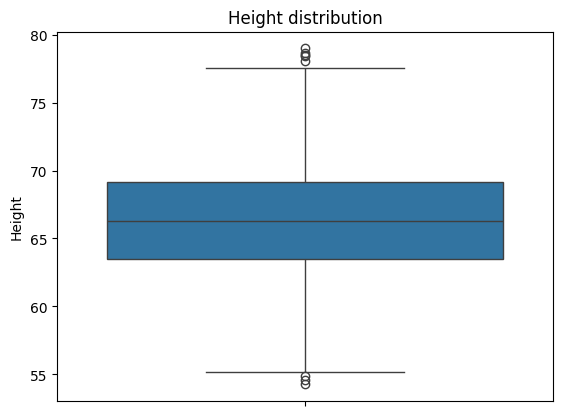

In [63]:
create_boxplot(df,'Height', title = 'Height distribution')

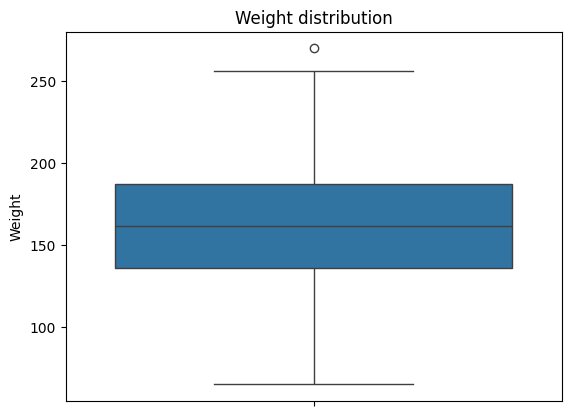

In [64]:
create_boxplot(df,'Weight', title = 'Weight distribution')

In [65]:
df['gender'] = df['Gender']
df = df.drop(columns=['Gender'])

In [66]:
df['weight'] = df['Weight']
df = df.drop(columns=['Weight'])

In [67]:
df['height'] = df['Height']
df = df.drop(columns=['Height'])

In [68]:
df

,gender,weight,height
0,Male,241.893563,73.847017
1,Male,162.310473,68.781904
2,Male,212.740856,74.110105
3,Male,220.042470,71.730978
4,Male,206.349801,69.881796
...,...,...,...
9995,Female,136.777454,66.172652
9996,Female,170.867906,67.067155
9997,Female,128.475319,63.867992
9998,Female,163.852461,69.034243


In [69]:
X = df.drop(columns=['height'])
X

,gender,weight
0,Male,241.893563
1,Male,162.310473
2,Male,212.740856
3,Male,220.042470
4,Male,206.349801
...,...,...
9995,Female,136.777454
9996,Female,170.867906
9997,Female,128.475319
9998,Female,163.852461


In [70]:
y = df['height']
y

0       73.847017
1       68.781904
2       74.110105
3       71.730978
4       69.881796
          ...    
9995    66.172652
9996    67.067155
9997    63.867992
9998    69.034243
9999    61.944246
Name: height, Length: 10000, dtype: float64

In [71]:
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size= 0.2 , random_state=42)

# Pipeline 

In [72]:
weight_pipe = Pipeline(steps=[
    ('outliers', Winsorizer(capping_method='gaussian', fold=3)),
    ('scale', StandardScaler())
])
weight_pipe

Pipeline(steps=[('outliers', Winsorizer(fold=3)), ('scale', StandardScaler())])

# Column Transformer

In [73]:
set_config(transform_output='pandas')

In [74]:
preprocessor = ColumnTransformer(transformers=[
    ('weight', weight_pipe, ['weight']), 
    ('gender', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), ['gender'])
], remainder='passthrough' , n_jobs=1)
preprocessor

ColumnTransformer(n_jobs=1, remainder='passthrough',
                  transformers=[('weight',
                                 Pipeline(steps=[('outliers',
                                                  Winsorizer(fold=3)),
                                                 ('scale', StandardScaler())]),
                                 ['weight']),
                                ('gender',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 ['gender'])])

In [75]:
preprocessor.fit_transform(X_train)

,weight__weight,gender__gender_Female,gender__gender_Male
9254,-1.268654,1.0,0.0
1561,1.499785,0.0,1.0
1670,1.234593,0.0,1.0
6087,-0.842240,1.0,0.0
6669,-0.035090,1.0,0.0
...,...,...,...
5734,-0.689901,1.0,0.0
5191,-2.203629,1.0,0.0
5390,-0.141235,1.0,0.0
860,0.563782,0.0,1.0


In [76]:
preprocessor.get_params()

{'n_jobs': 1,
 'remainder': 'passthrough',
 'sparse_threshold': 0.3,
 'transformer_weights': None,
 'transformers': [('weight',
   Pipeline(steps=[('outliers', Winsorizer(fold=3)), ('scale', StandardScaler())]),
   ['weight']),
  ('gender',
   OneHotEncoder(handle_unknown='ignore', sparse_output=False),
   ['gender'])],
 'verbose': False,
 'verbose_feature_names_out': True,
 'weight': Pipeline(steps=[('outliers', Winsorizer(fold=3)), ('scale', StandardScaler())]),
 'gender': OneHotEncoder(handle_unknown='ignore', sparse_output=False),
 'weight__memory': None,
 'weight__steps': [('outliers', Winsorizer(fold=3)),
  ('scale', StandardScaler())],
 'weight__verbose': False,
 'weight__outliers': Winsorizer(fold=3),
 'weight__scale': StandardScaler(),
 'weight__outliers__add_indicators': False,
 'weight__outliers__capping_method': 'gaussian',
 'weight__outliers__fold': 3,
 'weight__outliers__missing_values': 'raise',
 'weight__outliers__tail': 'right',
 'weight__outliers__variables': None,
 '

# Model Pipeline 

In [81]:
model_params = {
    'alpha': 1.0,
    'l1_ratio': 0.5,        
    'fit_intercept': True,  
    'copy_X': True,         
    'max_iter': 1000,       
    'tol': 0.0001           
}

In [82]:
model_pipe = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('clf',ElasticNet(**model_params))
])
model_pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(n_jobs=1, remainder='passthrough',
                                   transformers=[('weight',
                                                  Pipeline(steps=[('outliers',
                                                                   Winsorizer(fold=3)),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['weight']),
                                                 ('gender',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['gender'])])),
                ('clf', ElasticNet())])

In [83]:
model_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(n_jobs=1, remainder='passthrough',
                                   transformers=[('weight',
                                                  Pipeline(steps=[('outliers',
                                                                   Winsorizer(fold=3)),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['weight']),
                                                 ('gender',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['gender'])])),
                ('clf', ElasticNet())])

In [88]:
y_pred = model_pipe.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(mae) 
mse = mean_squared_error(y_test, y_pred)
print(mse) 
r2 = r2_score(y_test, y_pred)
print(r2)

1.693192282037306
4.391978027391422
0.7043657831455232


In [90]:
scores = {
    'mae' : mae,
    'mse' : mse, 
    'r2' : r2
}
scores

{'mae': 1.693192282037306, 'mse': 4.391978027391422, 'r2': 0.7043657831455232}

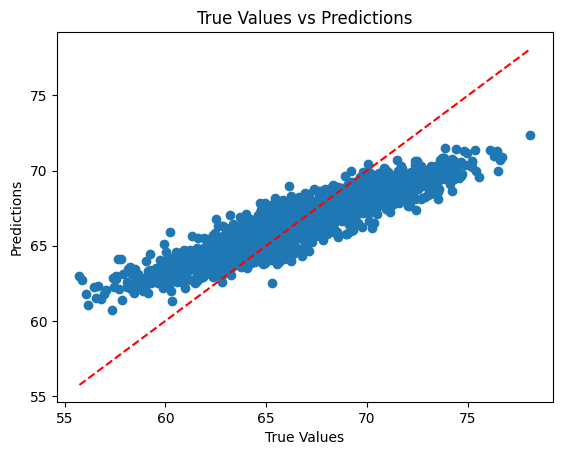

In [91]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Line of perfect prediction
plt.show()


# MLFLow Code Tracking 

In [92]:
model_pipe.get_params()

{'memory': None,
 'steps': [('preprocessor',
   ColumnTransformer(n_jobs=1, remainder='passthrough',
                     transformers=[('weight',
                                    Pipeline(steps=[('outliers',
                                                     Winsorizer(fold=3)),
                                                    ('scale', StandardScaler())]),
                                    ['weight']),
                                   ('gender',
                                    OneHotEncoder(handle_unknown='ignore',
                                                  sparse_output=False),
                                    ['gender'])])),
  ('clf', ElasticNet())],
 'verbose': False,
 'preprocessor': ColumnTransformer(n_jobs=1, remainder='passthrough',
                   transformers=[('weight',
                                  Pipeline(steps=[('outliers',
                                                   Winsorizer(fold=3)),
                                           

In [94]:
mlflow.set_tracking_uri("http://127.0.0.1:8000")
mlflow.set_experiment("Weight Data")

with mlflow.start_run() as run:
    data_signature = mlflow.models.infer_signature(model_input=X_train, model_output=model_pipe.predict(X_train))
    
    mlflow.log_params(model_pipe.get_params())
    mlflow.log_metrics(scores)
    mlflow.sklearn.log_model(sk_model=model_pipe, artifact_path="model.pkl", signature=data_signature)
    
    model_uri = mlflow.get_artifact_uri("model.pkl")
    # mlflow.log_figure(cm.figure_, artifact_file='confusion_matrix.png')
    
    # Save X_train to a CSV file before logging it
    X_train.to_csv("weight-height.csv", index=False)
    mlflow.log_artifact("weight-height.csv")

2024/09/21 23:44:53 INFO mlflow.tracking._tracking_service.client: 🏃 View run serious-bug-621 at: http://127.0.0.1:8000/#/experiments/776813692271308716/runs/d485eea334c44d5c8d74aa33e33342a9.
2024/09/21 23:44:53 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:8000/#/experiments/776813692271308716.


In [110]:
import mlflow
logged_model = 'runs:/d485eea334c44d5c8d74aa33e33342a9/model.pkl'

# Load model as a PyFuncModel.
loaded_model = mlflow.pyfunc.load_model(logged_model)

import pandas as pd
loaded_model.predict(pd.DataFrame(X_test))

array([67.09047271, 68.51755127, 66.93836814, ..., 64.05573036,
       68.0371382 , 62.61799537])